In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [4]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.shape

(1338, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
#statistical measures of the dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\Abhinand Prameesh\AppData\Local\Temp\ipykernel_16512\3930916423.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


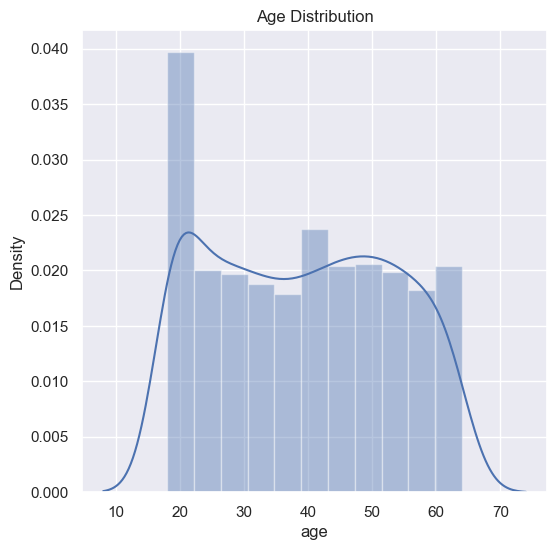

In [12]:
sns.set()
plt.figure(figsize=(6, 6))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

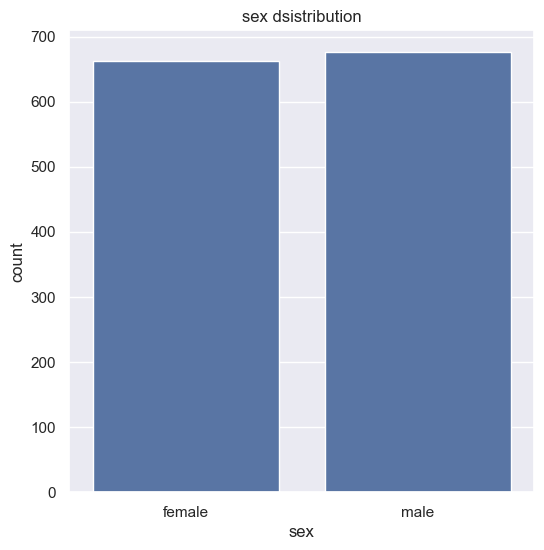

In [13]:
plt.figure(figsize=(6, 6))
sns.countplot(x='sex', data=df)
plt.title("sex dsistribution")
plt.show()

In [14]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

C:\Users\Abhinand Prameesh\AppData\Local\Temp\ipykernel_16512\2884854146.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])


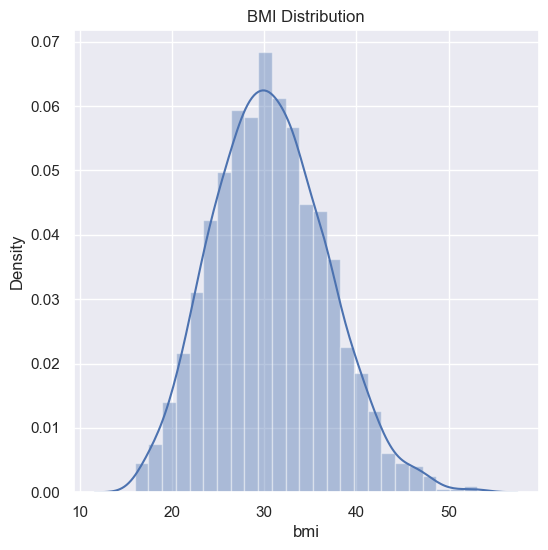

In [15]:
plt.figure(figsize=(6, 6))
sns.distplot(df['bmi'])
plt.title('BMI Distribution')
plt.show()

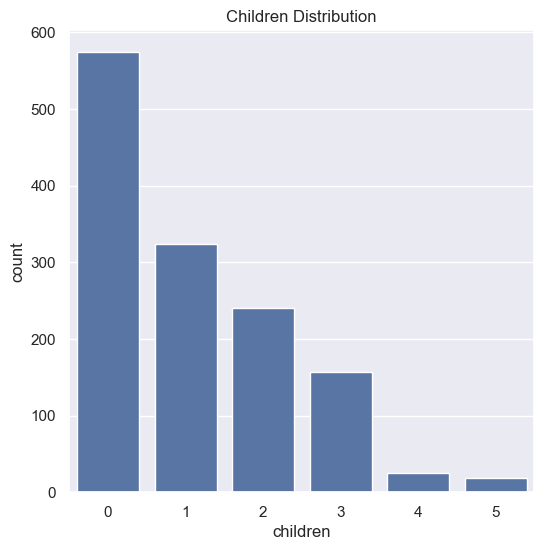

In [17]:
#normal BMI range is 18.5 to 24.9
plt.figure(figsize=(6, 6))
sns.countplot(x='children', data=df)
plt.title("Children Distribution")
plt.show()

In [18]:
df.value_counts()

age  sex     bmi     children  smoker  region     charges    
19   male    30.590  0         no      northwest  1639.56310     2
47   male    29.830  3         no      northwest  9620.33070     1
48   female  25.850  3         yes     southeast  24180.93350    1
             22.800  0         no      southwest  8269.04400     1
47   male    47.520  1         no      southeast  8083.91980     1
                                                                ..
31   female  25.740  0         no      southeast  3756.62160     1
             23.600  2         no      southwest  4931.64700     1
             21.755  0         no      northwest  4134.08245     1
30   male    44.220  2         no      southeast  4266.16580     1
64   male    40.480  0         no      southeast  13831.11520    1
Name: count, Length: 1337, dtype: int64

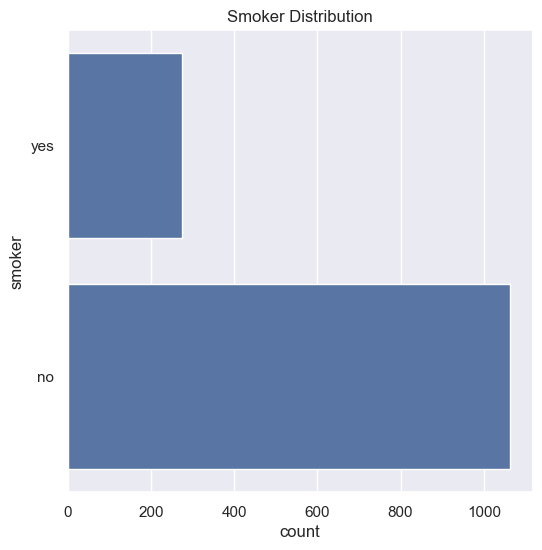

In [19]:
plt.figure(figsize=(6, 6))
sns.countplot(df['smoker'])
plt.title('Smoker Distribution')
plt.show()

In [20]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

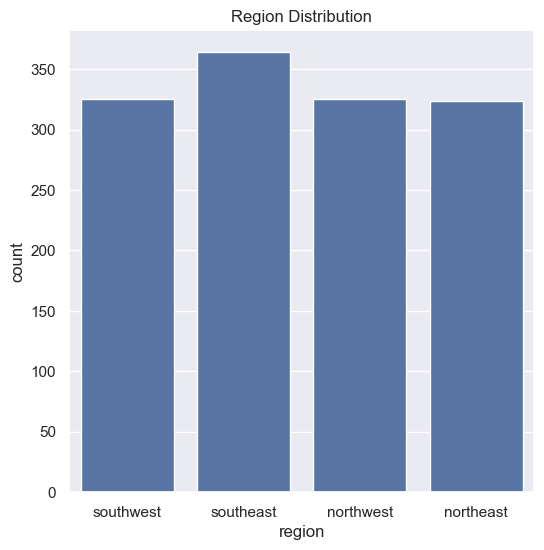

In [21]:
plt.figure(figsize=(6, 6))
sns.countplot(x='region', data=df)
plt.title('Region Distribution')
plt.show()

In [22]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

C:\Users\Abhinand Prameesh\AppData\Local\Temp\ipykernel_16512\3234296474.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'])


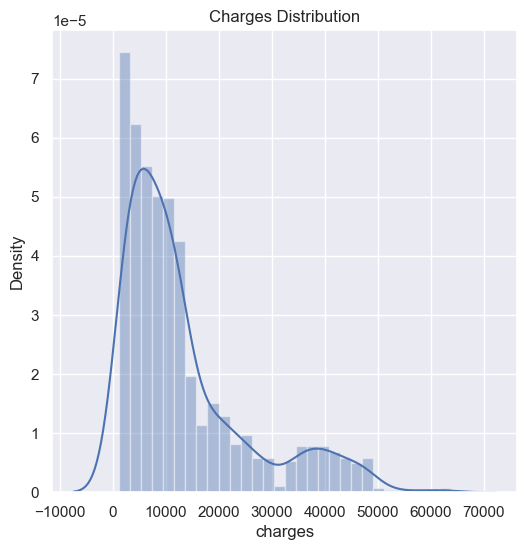

In [23]:
plt.figure(figsize=(6, 6))
sns.distplot(df['charges'])
plt.title('Charges Distribution')
plt.show()

In [27]:
# Data Preprocessing
df.replace({'sex':{'male':0, 'female':1}}, inplace=True)

C:\Users\Abhinand Prameesh\AppData\Local\Temp\ipykernel_16512\1330925208.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'sex':{'male':0, 'female':1}}, inplace=True)


In [28]:
df.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)

C:\Users\Abhinand Prameesh\AppData\Local\Temp\ipykernel_16512\3949979713.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)


In [29]:
df.replace({'region':{'southwest':1, 'southeast':0, 'northwest':3, 'northeast':2}}, inplace=True)

C:\Users\Abhinand Prameesh\AppData\Local\Temp\ipykernel_16512\3942557728.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'region':{'southwest':1, 'southeast':0, 'northwest':3, 'northeast':2}}, inplace=True)


In [30]:
X = df.drop(columns='charges', axis=1)
Y = df['charges']

In [31]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [32]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [34]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [35]:
#model training 
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
training_DataPrediction = regressor.predict(X_train)
test_DataPrediction = regressor.predict(X_test)
r2_train = metrics.r2_score(Y_train, training_DataPrediction)
print("R squared value for training data: ", r2_train)
r2_test = metrics.r2_score(Y_test, test_DataPrediction)
print("R squared value for test data: ", r2_test)

R squared value for training data:  0.751505643411174
R squared value for test data:  0.7447273869684077


In [36]:
input_data = (31,1,25.74,0,1,0)

In [39]:
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
prediction = regressor.predict(input_data_reshaped)
print("The insurance cost is: ", prediction[0])

The insurance cost is:  3760.0805764960496


c:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
